# Problem Statement
### To classify Iris Flower into 3 species - Setosa, Versicolor and Verginica based on 4 parameters that are :
### Sepal Length, Petal Length, Sepal Width, Petal Width


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Reading Iris dataset from csv file
iris = pd.read_csv("iris.csv")

In [4]:
#Printing dimensions of Iris Dataset
print(iris.shape)

(150, 5)


In [6]:
#Printing and Reviewing DataSet
print(iris)

     sepal.length  sepal.width  petal.length  petal.width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
5             5.4          3.9           1.7          0.4     Setosa
6             4.6          3.4           1.4          0.3     Setosa
7             5.0          3.4           1.5          0.2     Setosa
8             4.4          2.9           1.4          0.2     Setosa
9             4.9          3.1           1.5          0.1     Setosa
10            5.4          3.7           1.5          0.2     Setosa
11            4.8          3.4           1.6          0.2     Setosa
12            4.8          3.0           1.4          0.1     Setosa
13            4.3          3.0    

In [7]:
#To view individual column counts,data type and check whether dataset is balanced or not. 
iris["variety"].value_counts()

Versicolor    50
Virginica     50
Setosa        50
Name: variety, dtype: int64

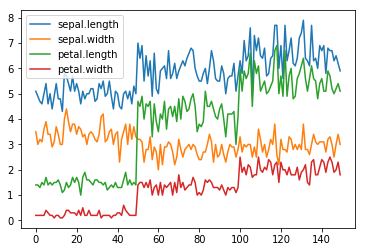

In [11]:
#As all the varieties have same number of enteries so it is a balanced dataset.
#Now we will analyse the data in 2D plot.
#First I am using just pyplot function plot to plot the graph
iris.plot() #default plt used is the line plot

## BIVARIATE ANALYSIS

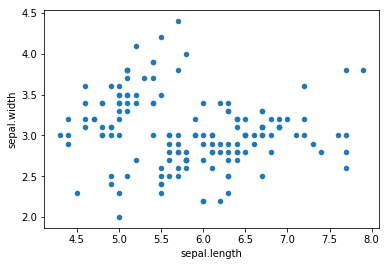

In [15]:
#Now we will plot the graph based on parameters on x axis and y axis
iris.plot(kind = "scatter",x="sepal.length",y="sepal.width")
#But we are not able to distinguish between variety or species#, we can also use Seaborn's joint plot for same purpose
#Now to differentiate the scatter points on the basis of variety we use Seaborn's facetgrid function

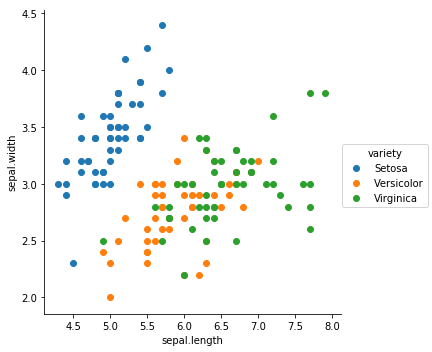

In [19]:
sns.FacetGrid(iris,hue="variety",size=5).map(plt.scatter,"sepal.length","sepal.width").add_legend()

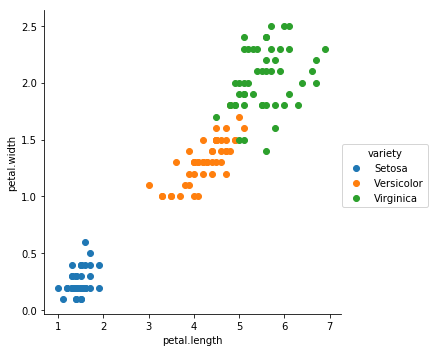

In [20]:
sns.FacetGrid(iris,hue="variety",size=5).map(plt.scatter,"petal.length","petal.width").add_legend
#Now we can clearly observe that if we take petal length and petal width as parameters then we can get much better discrimination
#The setosa flowers can easily be distinguished from versicolor and virginica. However we can find some overlapping in other two.

<bound method Grid.add_legend of <seaborn.axisgrid.FacetGrid object at 0x00000244BFF70748>>

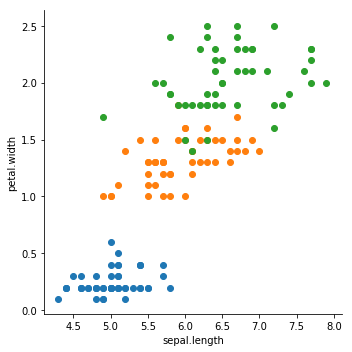

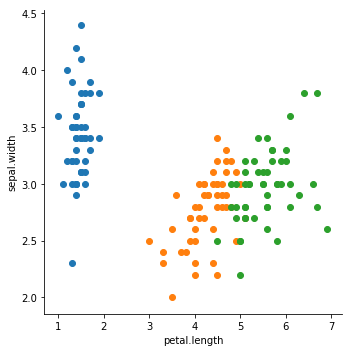

In [30]:
#Let's try on other two parameters.
sns.FacetGrid(iris,hue="variety",size=5).map(plt.scatter,"sepal.length","petal.width").add_legend
sns.FacetGrid(iris,hue="variety",size=5).map(plt.scatter,"petal.length","sepal.width").add_legend

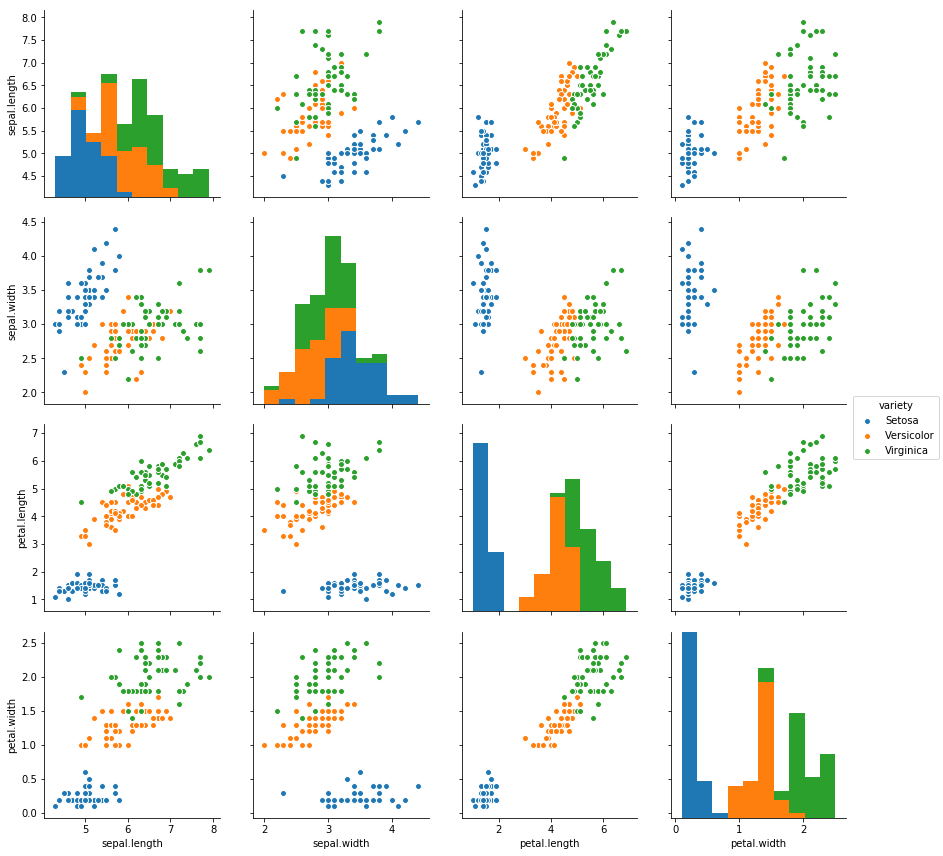

In [36]:
#We can do this directly by using pairplot. It gives us all possible combinations on x and y axis and the diagonal elements are 
#histogram by default but we can change them.
sns.pairplot(iris,"variety",size=3)
plt.show()
#Now we can observe the elements above the diagonal and below are same only axis differs so we can consider either upper or lower
#diagonal elements. By using pair plot we can quickly determine which 2 factors will be best suited to differentiate we do not
#need individually check each as we have done earlier.

# UNIVARIATE ANALYSIS 

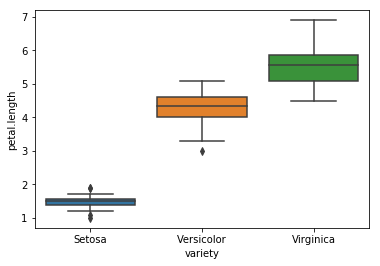

In [43]:
 Now as we have seen the max deviation variable we will further use that variable to distinguish categories.
#We will use petal.length
#Many univariate plots are available :
sns.boxplot(y="petal.length",x="variety",data=iris)
#Lower line= 25 percentile, mid= 50 and upper 75 && horizontal lines represent max and min values
#From these box plots it is clear - petal.length (sertosa)<2, (versicolor)<5 & >2, (virginica >=5)
#We can draw whiskers for better understanding - In seaborn we use 1.5*IQR(width of box)

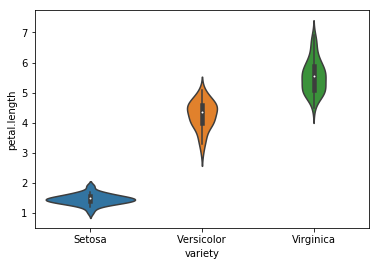

In [41]:
#For better understanding and spread we can use violinplot. It combines histogram and boxplot.
#The internal black area is box plot. It draws histograms/probab dist function in sideways.
sns.violinplot(y="petal.length",x="variety",data=iris)

## MULTIVARIATE ANALYSIS 

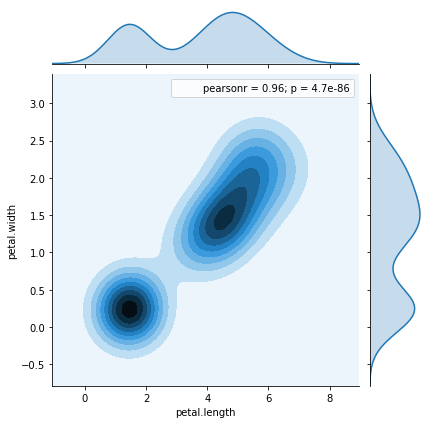

In [14]:
#When analysis is done on more than 2 parameters or variables.
#Now we will consider a variety i.e. Setosa and two variables like - petal.length and petal.width
#Now the denser region is at centre which makes hill like structure and height of hill is more where points are more.
#We will use colour variations called contours for the same.Darker(high density),Lighter(low density).
#Contour Density Plots(2D) types available are  [“scatter” | “reg” | “resid” | “kde” | “hex”]
sns.jointplot(x="petal.length",y="petal.width",data=iris,kind="kde")

In [16]:
#describe() function automatically gives us the mean,std,min and max of the dataset
iris.describe()

sepal.length  sepal.width  petal.length  petal.width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

In [17]:
iris.variety.describe()

count        150
unique         3
top       Setosa
freq          50
Name: variety, dtype: object

In [ ]:
#Now we are done with understanding the problem statement and visualising various parameters further we would have to predict
#any model which can give results.
#Calculating MEAN,VARIANCE AND STANDARD DEVIATION
#They corrupt easily just if there is one or two outliers.
#MEDIAN,QUANTILE AND PERCENTILE
